In [3]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [4]:
# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
mean_age = df['age'].mean(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
df['age'] = df['age'].fillna(mean_age)

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값이 평균으로 대체)
df['age'].head(10)

0    22.000000
1    38.000000
2    26.000000
3    35.000000
4    35.000000
5    29.699118
6    54.000000
7     2.000000
8    27.000000
9    14.000000
Name: age, dtype: float64

In [ ]:
df=sns.load_dataset('titanic')
# 객실별 성별에 따른 평균값으로 해당 결측치를 대처  --> transform 메서드
df.groupby(['pclass','sex'])['age'].transform('mean')

0      26.507589
1      34.611765
2      21.750000
3      34.611765
4      26.507589
         ...    
886    30.740707
887    34.611765
888    21.750000
889    41.281386
890    26.507589
Name: age, Length: 891, dtype: float64

In [ ]:
# 평균 VS 중위수 어떤 기준으로 선택
# 평균
    # 이상치 비중이 낮을 때
# 중위수
    # 이상치 비중이 높을 때
# 결측치가 많을 때 (50% 이상) 
    # 결측치를 버릴 수 없는 이유 : 데이터가 많을수록 머신러닝의 성능이 조금이라도 좋아지기 때문
    # 머신러닝/딥러닝 기반의 보간을 고려한 것

import matplotlib.pyplot as plt
plt.boxplot

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

<Axes: >

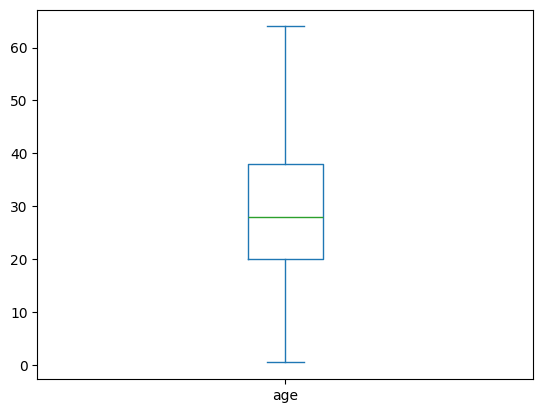

In [9]:
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr  = q3 - q1
lower = q1 - iqr*1.5
upper = q3 + iqr*1.5
outlier_mask = (df['age'] >= lower) & (df['age'] <= upper)
print(df[outlier_mask])
df[outlier_mask]['age'].plot(kind='box')



In [ ]:
# rel_diff = abs(mean-median) / (abs(median) +1e-8)
# 델타 = 상대적 평균 - 중앙값의 차이
    # 평균이 중앙값에서 얼마나 떨어져있는지를 상대적으로 본 값 
    # 델타가 크면 분포가 치우쳐져 있거나 또는 outlier(이상치) 평균을 끌어당긴다.
# 세타 = 이상치 비율(IQR기준)
    # IQR = Q3 - Q1  / 이상치 = (Q1-1.5*IQR ~ Q3+1.5*IQR)
# 관측치 중 IQR기준으로 이상치에 해당하는 값이 차지하는 비율(세타) 값이 크다 -> 평균이 불안정

# outlier_frac 이상치 비율 = 이상치 개수/데이터 개수

# rel_diff < 델타 and outlier_frac < 세타 :
# mean 평균
# else
# median 중앙값
# 델타와 세타에 해당하는 값은 
# 보수적(이상치에 민감) 델타 0.05(5%) 세타 0.01(1%)
# 보통(추천**) 델타 0.08~0.10   세타 0.02~0.03
# 관대 (어느정도 편차는 허용) 델타 0.15   세타 0.05

In [11]:
print(1e2)
print(1e-2)

100.0
0.01


In [23]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic = titanic.dropna(subset=['age']) 
mean = titanic['age'].mean()
median = titanic['age'].median()
# 상대 차이
rel_diff = abs(mean-median) / abs(median)+1e-8
# 이상치 비율 계산 이상치 개수 / 전체 개수
# q1-1.5iqr ~ q3+1.5iqr
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr  = q3 - q1
lower = q1 - iqr*1.5
upper = q3 + iqr*1.5
outlier_frac = ((titanic['age'] < lower) | (titanic['age'] > upper))
delta, setha = 0.08, 0.02
if rel_diff < delta and outlier_frac < setha :
    print('mean')
else:
    print('median')


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().